# Predicting customer churn comparing Gradient Boosting and Logistic Regression models

## 1. Framing the Business Problem

A Telecom Company has evidence of customer churn and has provided a dataset with certain information regarding their clients. Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Why is it bad? Because revenue that was once captured by the business is no longer going to repeat. So, eventually, churn leads to increase company's efforts to acquire new clients, evetually increasing CAC (customer acquisition cost) & reducing profits. Moreover, acquiring new customers is more expensive than maintaining existing ones. The more customers you churn, the more money you must spend to regain new one that will cover the loss of business.

A good practice that most of the companies implement, is related to target potential churn customers in advance to try to see if there is space to take action beforehand. Therefore, any good CRM must have a solid prediction model to target potential loss of customers in advance.

In the following project I will work with the Telecom Company database containing information regarding their customers and churn situation.

## 2. Loading libraries and dataset

In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#reading the required data files
train = pd.read_csv('Telecom_Train.csv')
test = pd.read_csv('Telecom_Test.csv')

## 3. Exploratory Data Analysis (EDA)

In [52]:
#checking the train to test data ratio
test.shape[0]/train.shape[0]

0.5001500150015001

In [53]:
train.shape

(3333, 21)

In [54]:
train.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

**Comments**
- It looks like the dataset it's pretty clean.

In [55]:
#checking for missing values
train.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [56]:
train.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [57]:
train.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churn  
0                              1     no  
1                              1     no  
2                              0     no  
3                              2     no  
4                              3     no  

[5 rows x 21 columns]

In [58]:
#Creating a function that does all of the above tasks in one go
def get_basic_stats(dfname):
    print("Shape of dataframe is " + str(dfname.shape))
    print("Below are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("Below are missing values in each column")
    print(dfname.isna().sum().sort_values())
    print("Below are the number of unique values taken by a column")
    print(dfname.nunique().sort_values())
    print("Below are some records in DF")
    print("Below is distribution of numeric variables")
    print(dfname.describe())
    print(dfname.head())

In [59]:
get_basic_stats(train)

Shape of dataframe is (3333, 21)
Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are missing values in each column
Unnamed: 0     

In [60]:
get_basic_stats(test)

Shape of dataframe is (1667, 21)
Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are missing values in each column
Unnamed: 0     

In [61]:
#removing the unnamed column
train = train.drop(['Unnamed: 0'], axis =1 )
test = test.drop(['Unnamed: 0'], axis = 1)

#creating a copy to keep the original dataframes intact
train2 = train.copy()
test2 = test.copy()

In [63]:
#creating binary variables from categorical variables that take just 2 unique values
yes_no_vars = ['churn', 'international_plan', 'voice_mail_plan']

def cat_to_binary(df, varname):
    df[varname + '_num'] = df[varname].apply(lambda x : 1 if x == 'yes' else 0)
    print("checking")
    print(df.groupby([varname + '_num', varname]).size())
    return df


for indexer, varname in enumerate(yes_no_vars):
    train2 = cat_to_binary(train2, varname)
    test2 = cat_to_binary(test2, varname)

checking
churn_num  churn
0          no       2850
1          yes       483
dtype: int64
checking
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
checking
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64
checking
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64
checking
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


In [64]:
#dropping object vars that have been converted to numeric
train2 = train2.drop(yes_no_vars, axis =1)
test2 = test2.drop(yes_no_vars, axis =1)

In [65]:
#now we are left with just 2 categorical variables
train2.dtypes.sort_values()

voice_mail_plan_num                int64
account_length                     int64
churn_num                          int64
number_vmail_messages              int64
number_customer_service_calls      int64
total_day_calls                    int64
total_intl_calls                   int64
total_eve_calls                    int64
international_plan_num             int64
total_night_calls                  int64
total_intl_charge                float64
total_intl_minutes               float64
total_eve_charge                 float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_night_charge               float64
area_code                         object
state                             object
dtype: object

### 3.1 Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

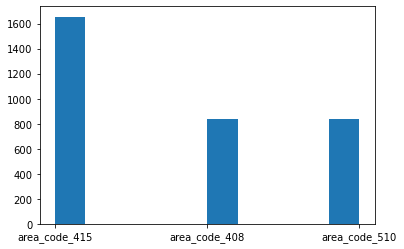

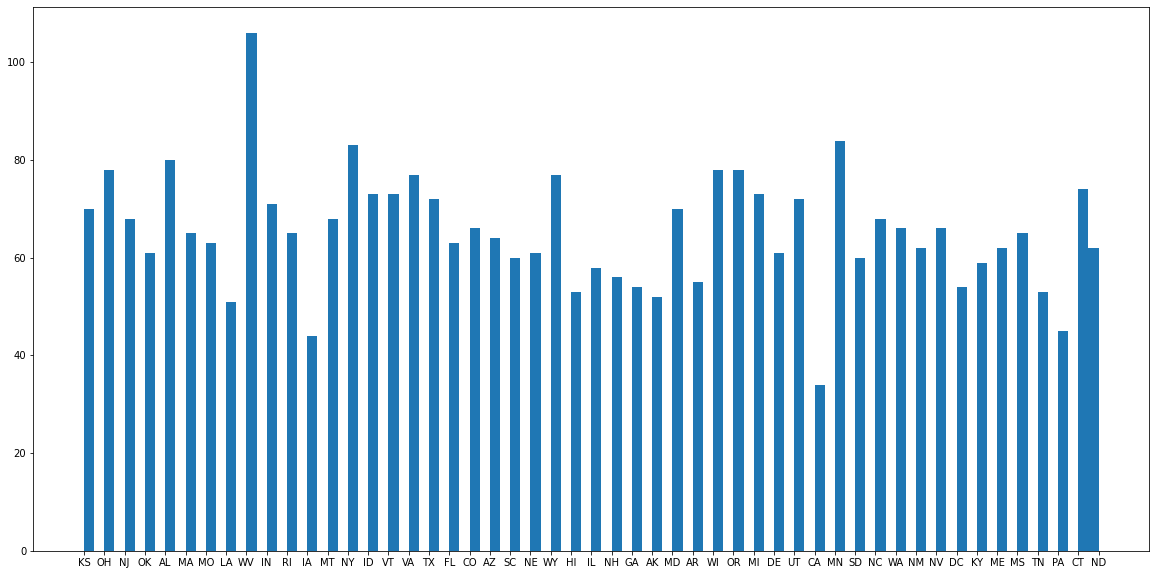

In [66]:
#univariate analysis of categorical variables
plt.hist(list(train2['area_code']))
plt.show
plt.figure(figsize = (20,10))
plt.hist(list(train2['state']), bins = 100)
plt.show

**Comments**
- The first graph shows 3 different area codes. We have no information of any of those codes.
- The second graph looks like the initials of each US state. WV seems to be the most frequent (West Virginia).
- California (CA) is the least frequent. 

In [67]:
train2.mean()

account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

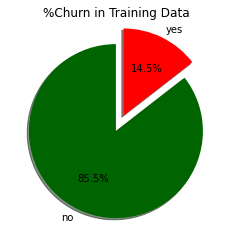

In [68]:
# Visualizing the churn variable
topie = train['churn'].value_counts(sort = True)
colorss = ["darkgreen","red"] 
plt.pie(topie,labels = topie.index.values, explode= [0, 0.2],  colors=colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('%Churn in Training Data')
plt.show()

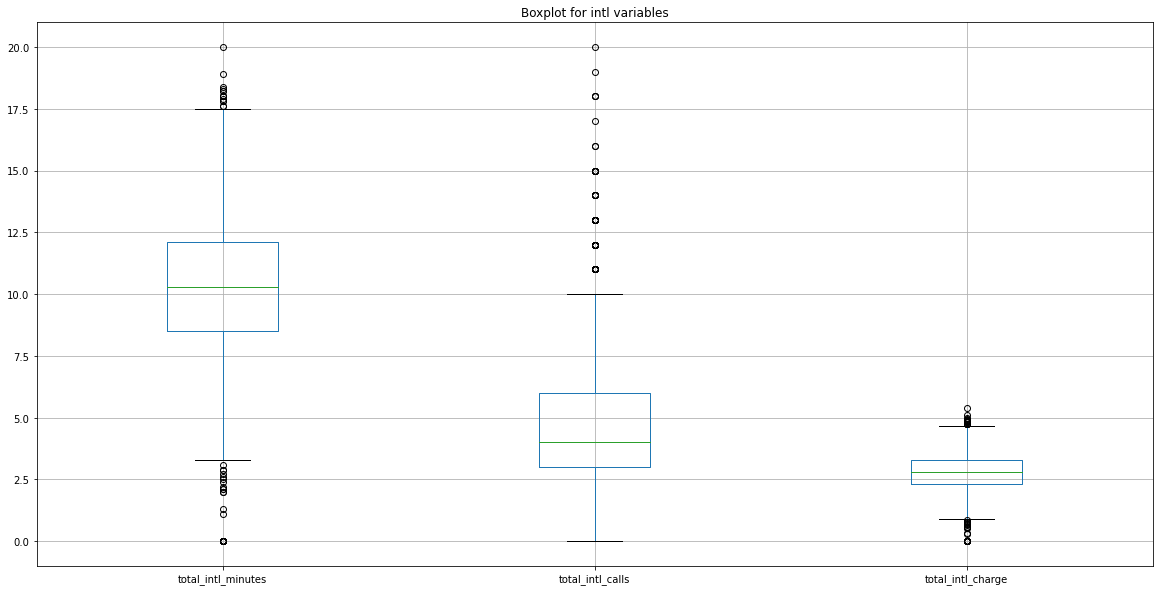

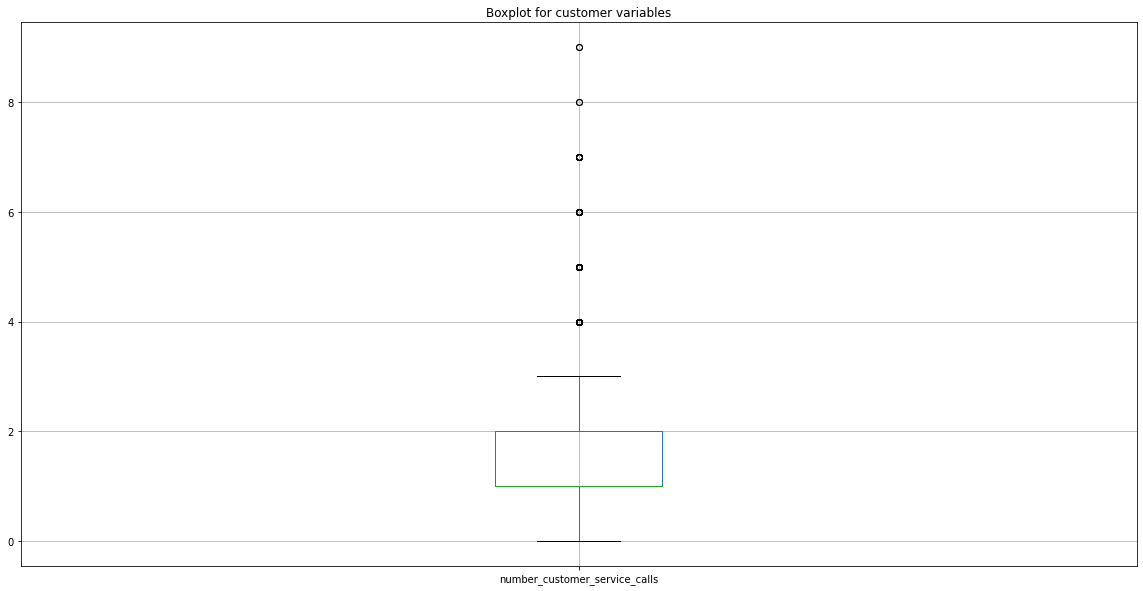

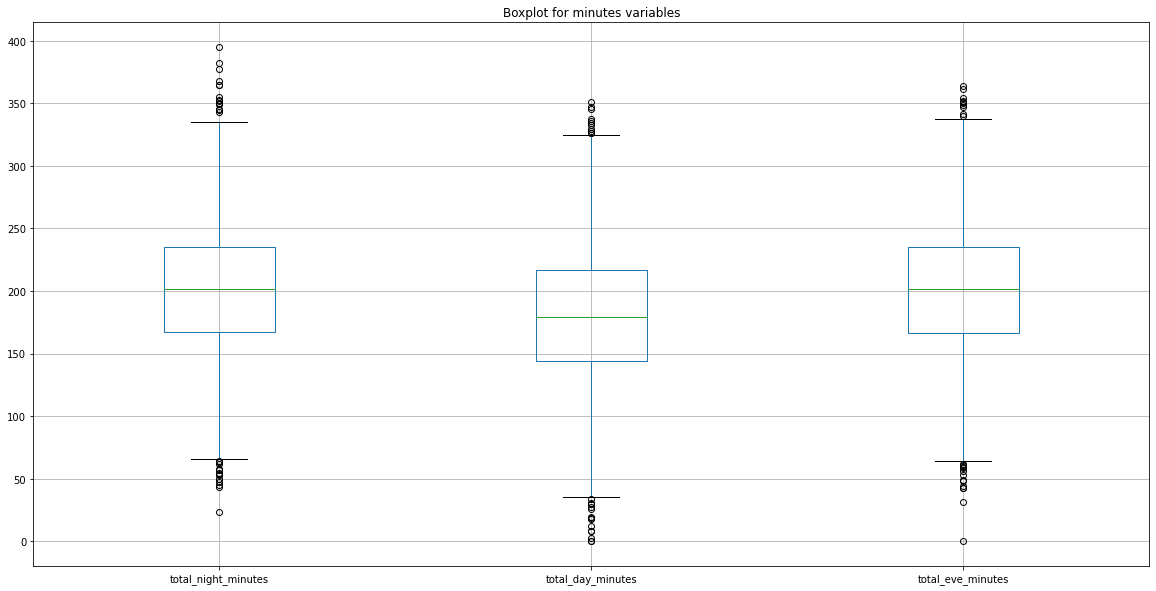

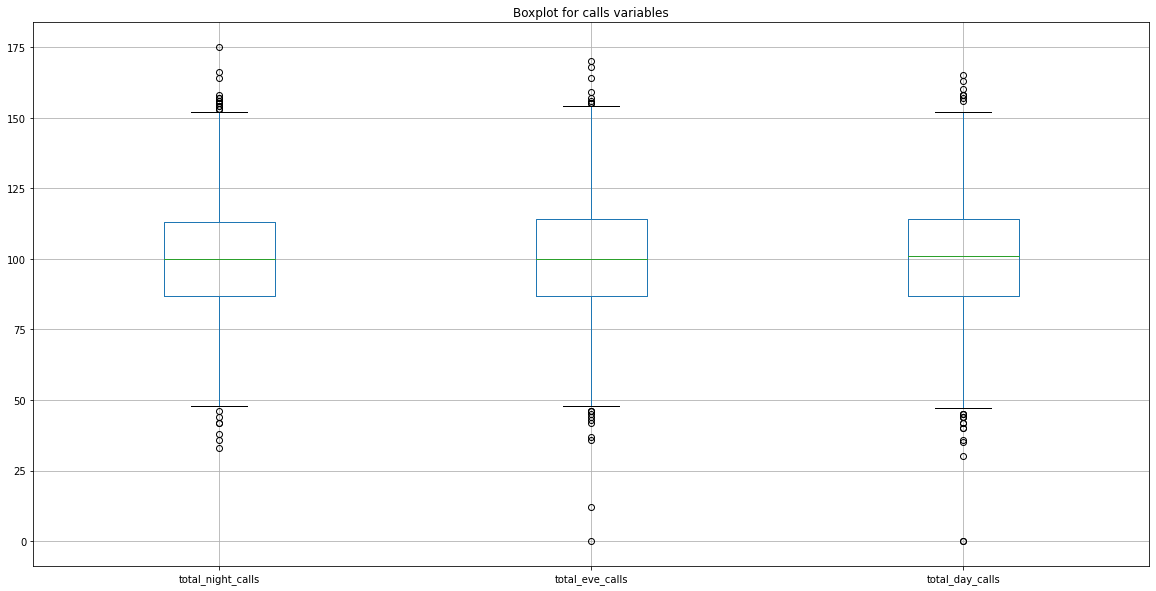

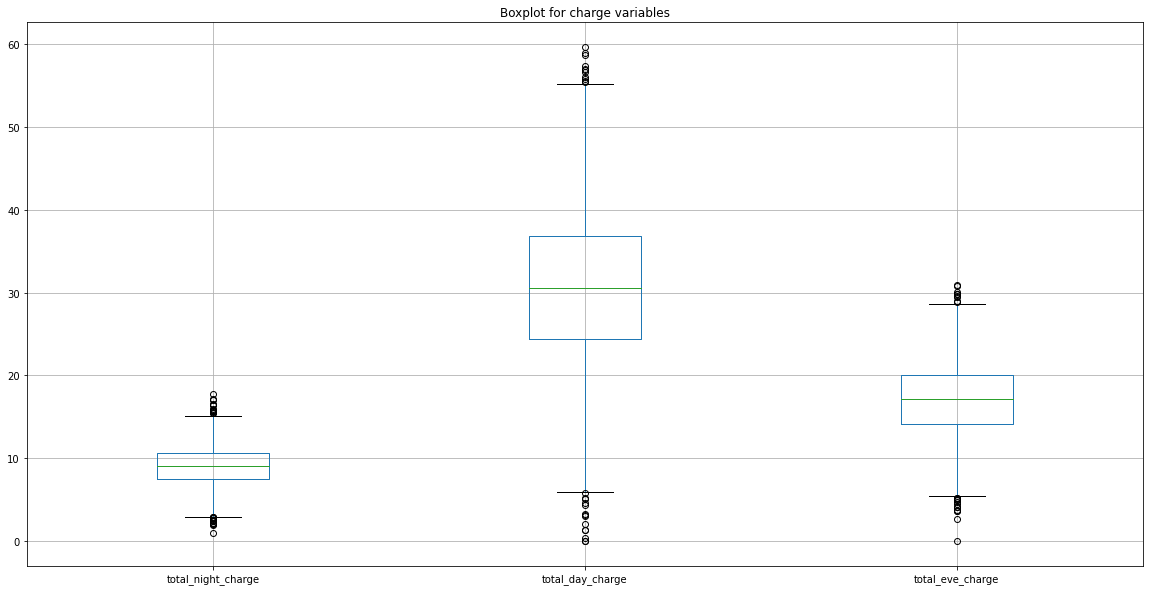

In [69]:
#creating a list of continuous variables, which would be visualized using boxplot
continuous_vars = train.select_dtypes([np.number]).columns.tolist()
#univariate analysis of continuous variables
type_of_vars = ['intl', 'customer', 'minutes', 'calls', 'charge']
remaining_list = train2.columns
for vartype in type_of_vars:
    temp_list = [x for x in remaining_list if vartype in x]
    remaining_list = list(set(remaining_list).difference(set(temp_list)))
    train2.boxplot(column=temp_list, figsize = (20,10) )
    plt.title('Boxplot for '+ vartype + ' variables')
    plt.show()

**Comments**
- Regarding the international minutes, calls and charges, it seems to have some outliers that are far from the whiskers.
- Number of customer service calls has only 6 observations classified as outliers by the boxplot.
- Regarding the minutes, it looks like the 3 distributions (night, day and eve minutes) have a similar behaviour in terms of distribution (normality), outliers (probably the same customers) and skewness. These are probably highly correlated.
- Same for the calls, which is quite obvious given that calls are measured in minutes.
- For charge variables, are quite different, but very reasonable. Day has a bigger mean, night a lower mean and eve is kind of in the middle.

## 4. Feature Creation

**Comments**
- A first hipothesis is that customer with high value of cost per minute to have higher churn rate, given that it's out of market for benchmark competitors.

['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
count    3333.000000
mean        0.100354
std         0.008440
min         0.066950
25%         0.094893
50%         0.100385
75%         0.106056
max         0.129791
Name: charge_per_minute, dtype: float64
count    1667.000000
mean        0.100772
std         0.008091
min         0.071362
25%         0.095293
50%         0.100634
75%         0.105932
max         0.128430
Name: charge_per_minute, dtype: float64


<AxesSubplot:>

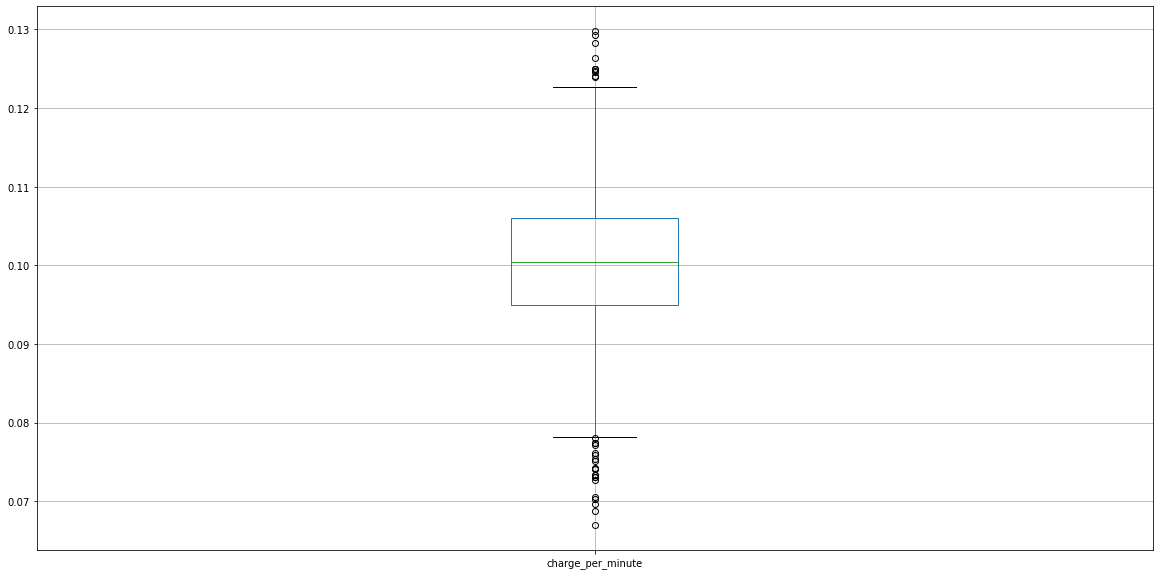

In [70]:
#Creating a charge per minute variable in both dataframes
charge_vars = [x for x in train.columns if 'charge' in x]
minutes_vars = [x for x in train.columns if 'minutes' in x]
print(charge_vars)
print(minutes_vars)

def create_cpm(df):
    df['total_charges'] = 0
    df['total_minutes'] = 0
    for indexer in range(0, len(charge_vars)):
        df['total_charges'] +=  df[charge_vars[indexer]]
        df['total_minutes'] +=  df[minutes_vars[indexer]]
    df['charge_per_minute'] = np.where(df['total_minutes'] >0, df['total_charges']/df['total_minutes'], 0)
    df.drop(['total_minutes', 'total_charges' ], axis = 1, inplace = True)
    print(df['charge_per_minute'].describe())
    return df


train2 = create_cpm(train2)
test2 = create_cpm(test2)

train2.boxplot(column='charge_per_minute', figsize = (20,10) )

### 4.1 Bivariate Analysis

In [71]:
#removing churn from train
X = train2.drop('churn_num', axis=1)

In [23]:
all_corr = X.corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by= ['corr_abs'], ascending = False )
corr_table.head(10)


<ipython-input-23-3042259bf7af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_table['corr_abs'] = corr_table['corr_value'].abs()


var1                   var2  corr_value  corr_abs
40     total_day_minutes       total_day_charge    1.000000  1.000000
97     total_eve_minutes       total_eve_charge    1.000000  1.000000
154  total_night_minutes     total_night_charge    0.999999  0.999999
211   total_intl_minutes      total_intl_charge    0.999993  0.999993
289  voice_mail_plan_num  number_vmail_messages    0.956927  0.956927
53     total_day_minutes      charge_per_minute    0.779747  0.779747
89      total_day_charge      charge_per_minute    0.779747  0.779747
197   total_night_charge      charge_per_minute   -0.569728  0.569728
161  total_night_minutes      charge_per_minute   -0.569703  0.569703
143     total_eve_charge      charge_per_minute   -0.149398  0.149398

**Comments**
- total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, voice_mail_plan_num variables can be dropped

<AxesSubplot:>

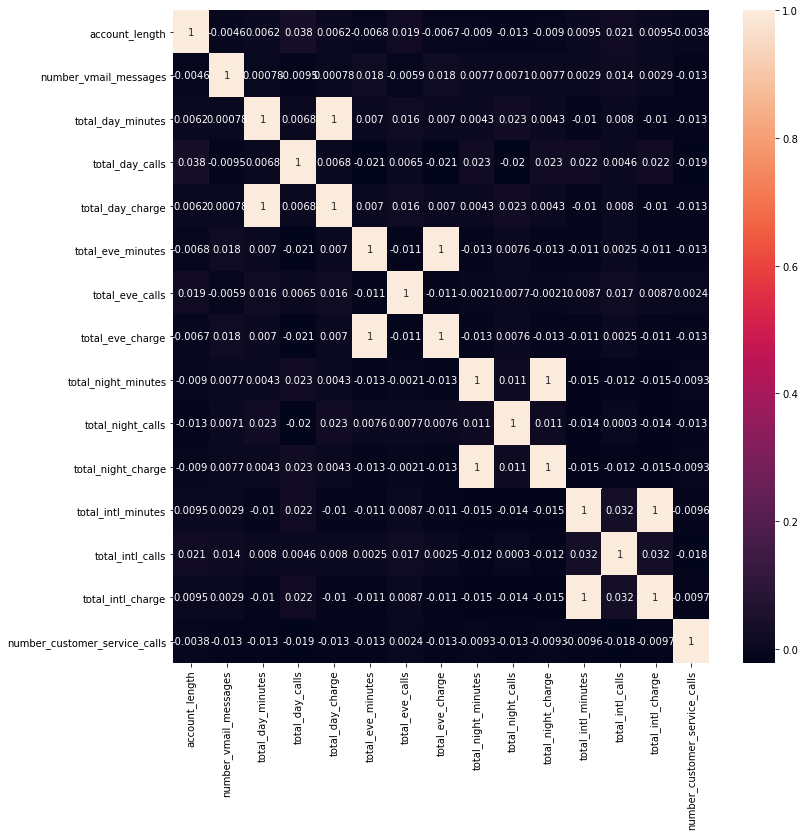

In [24]:
#creating a heat map to see the degree of correlation visually
plt.figure(figsize=(12, 12))
vg_corr = train2[continuous_vars].corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values,yticklabels = vg_corr.columns.values, annot = True)

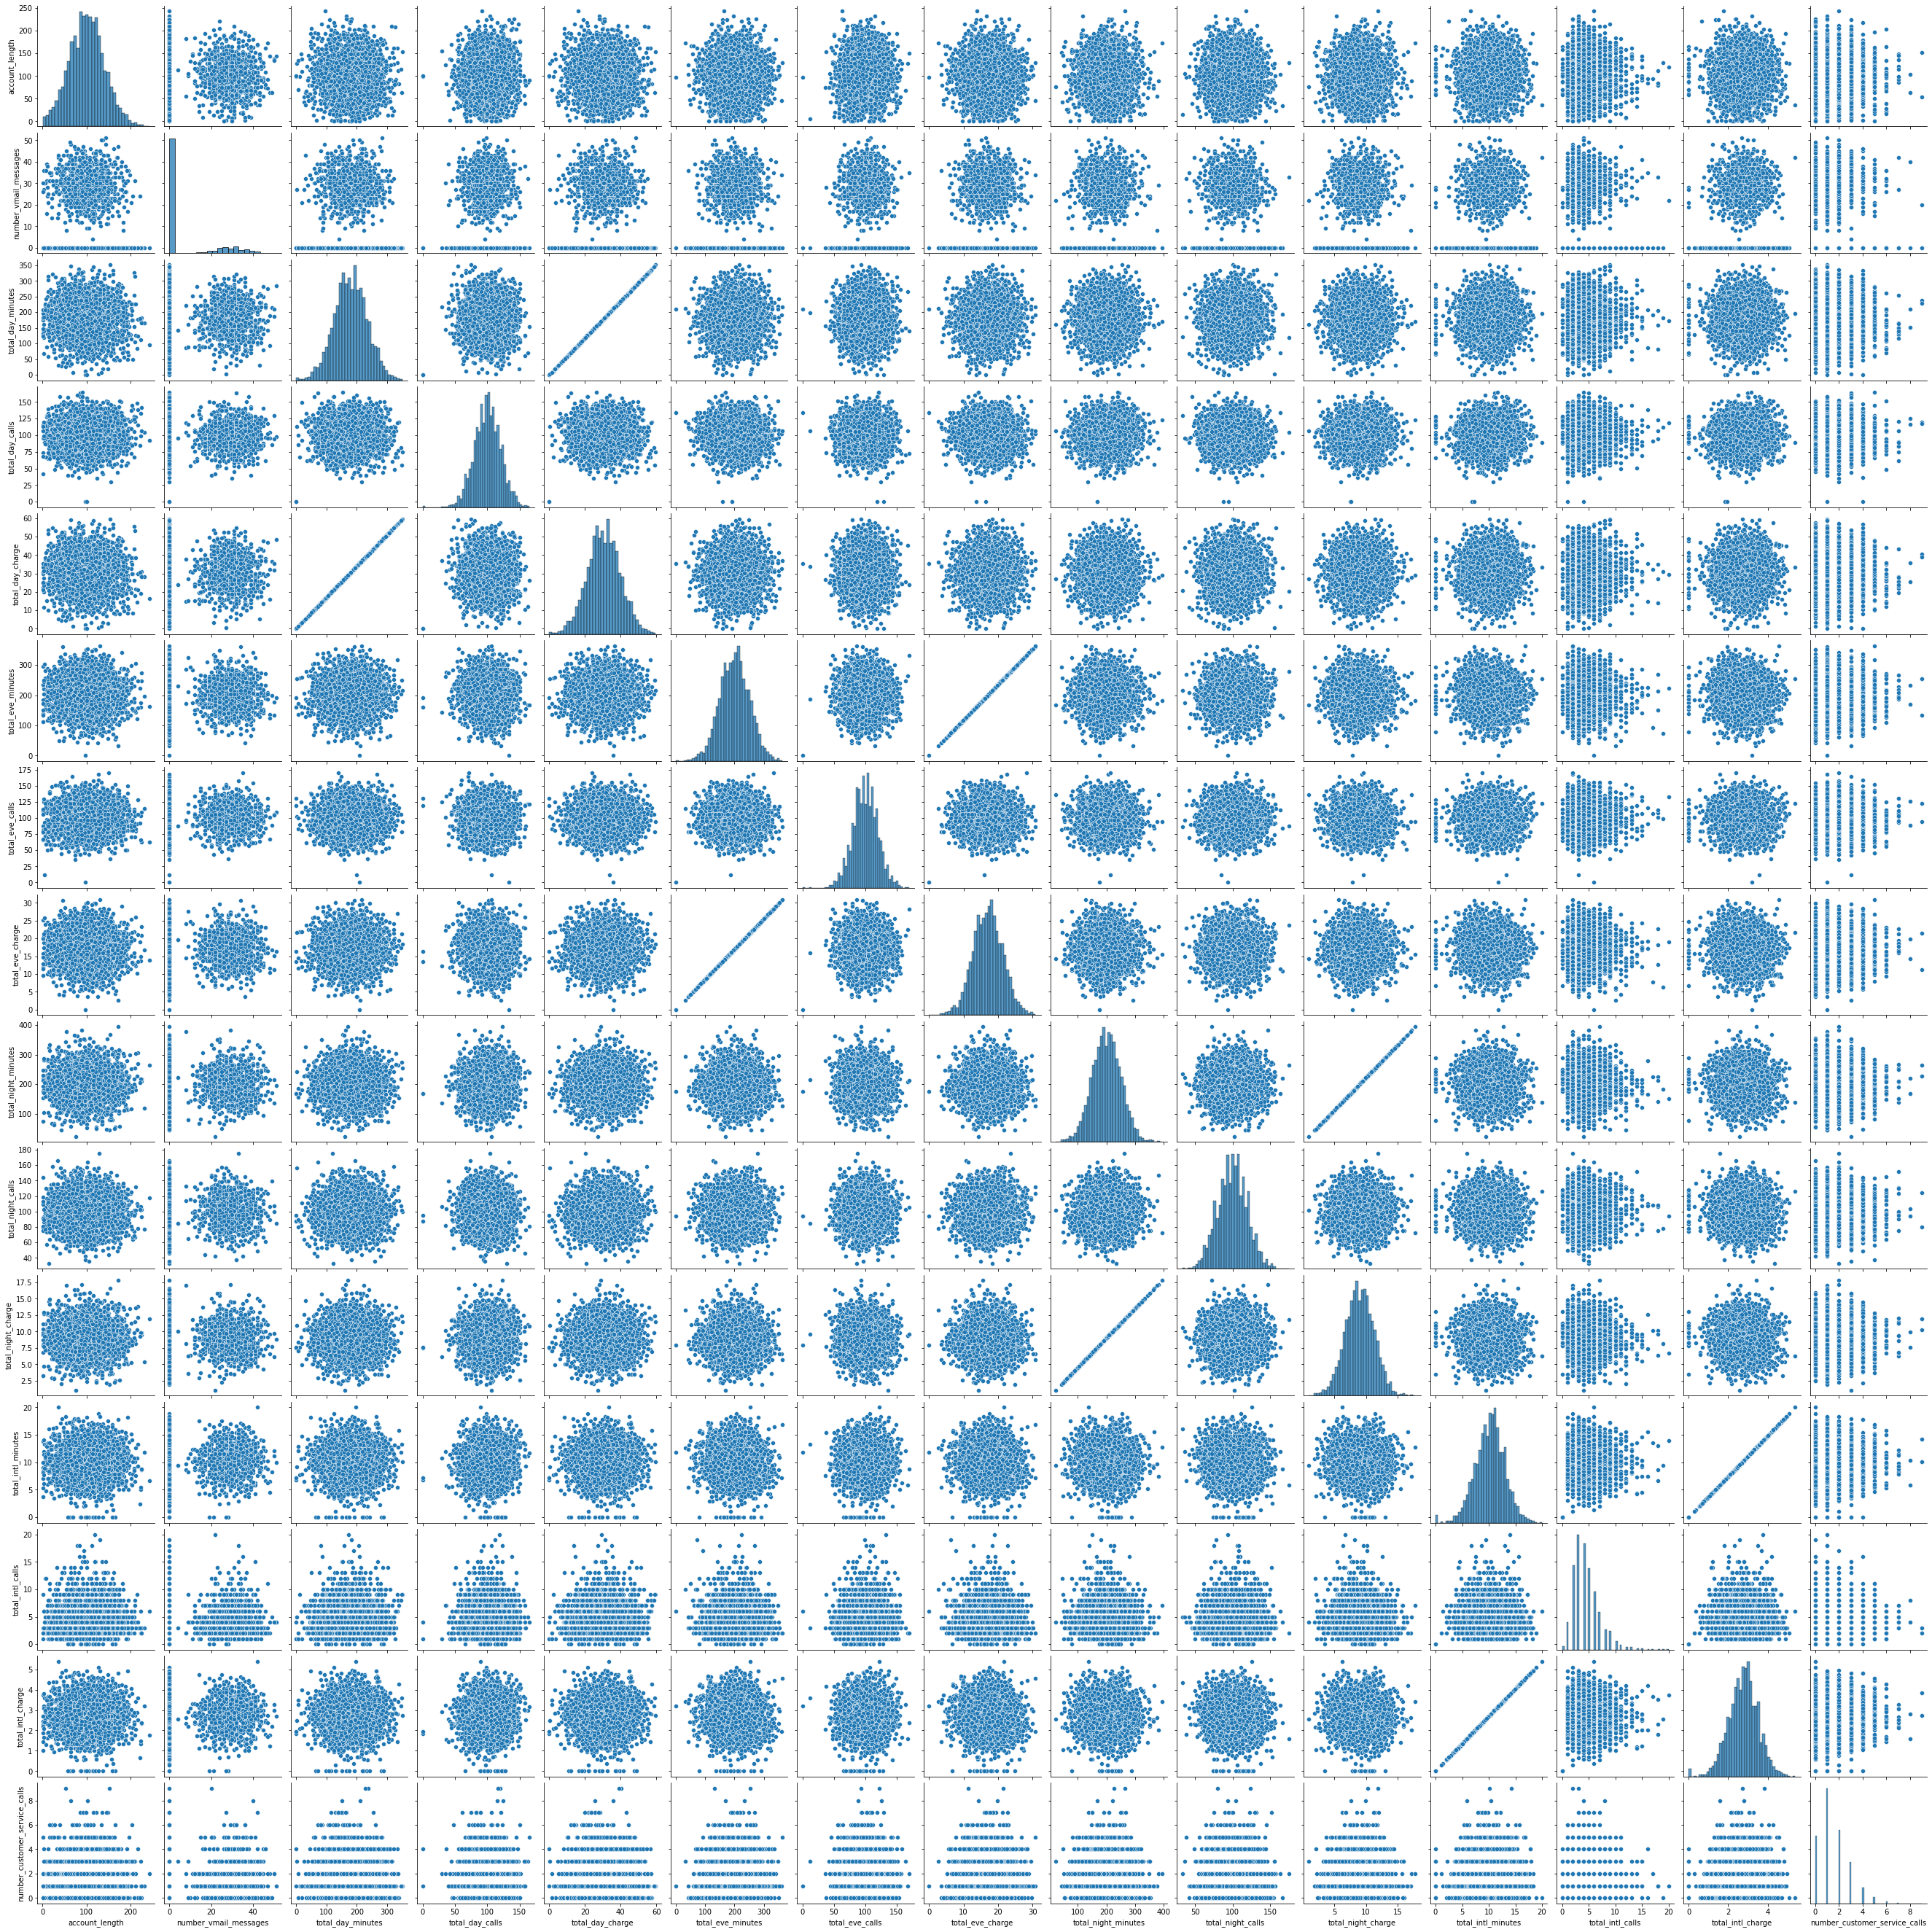

In [72]:
# PLotting each variable against the other..the diagonals show the histogram
sns.pairplot(train2[continuous_vars])

### 4.2 Plotting predictor trends with dependent variable 

<ipython-input-73-4efc21f88fda>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,5))


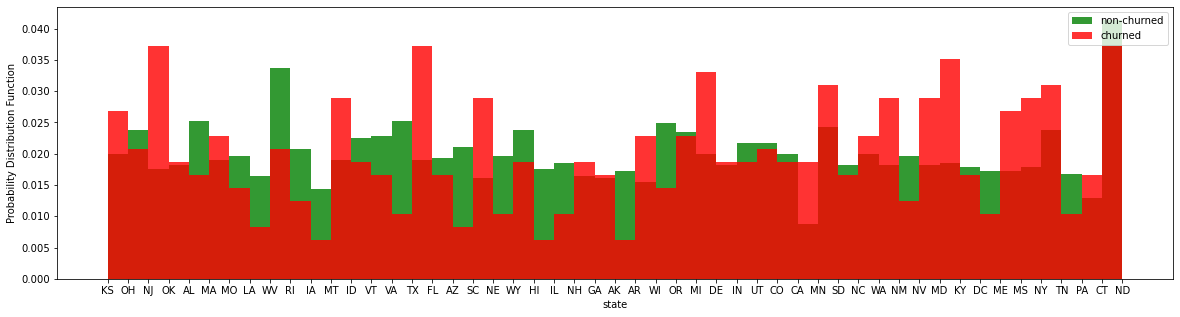

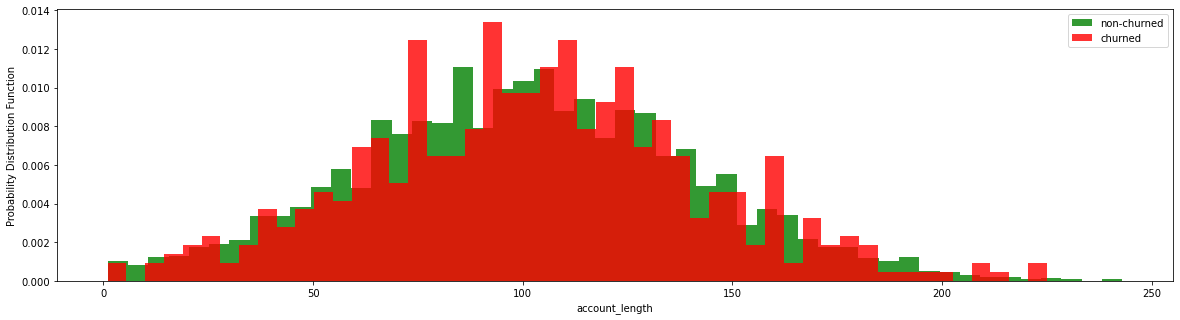

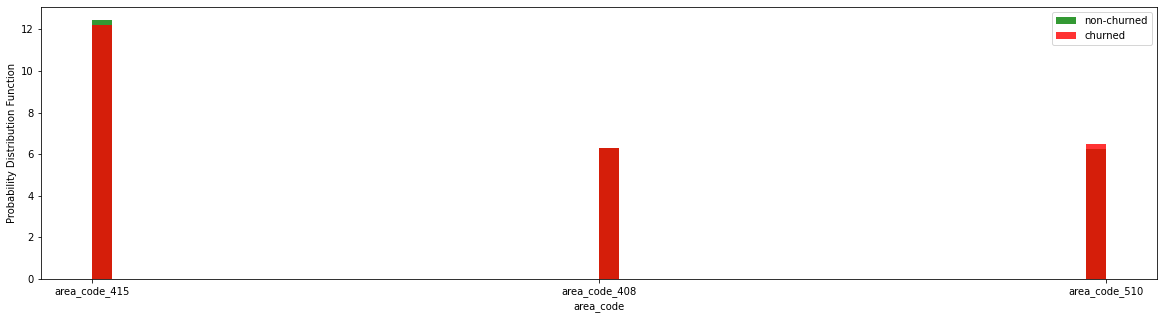

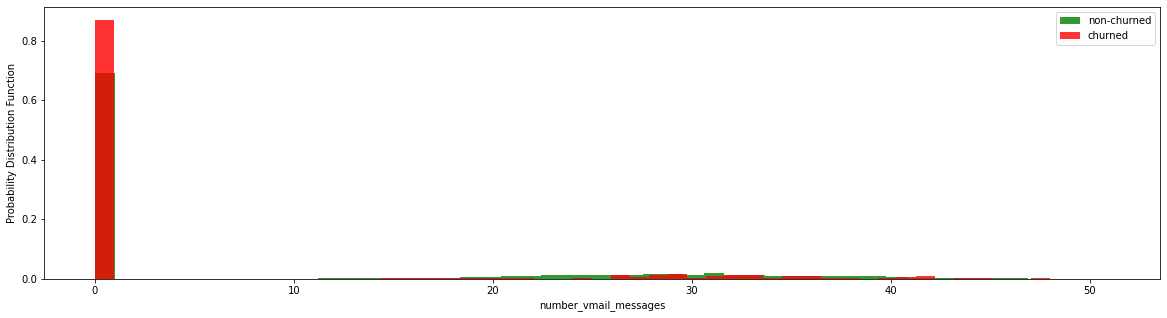

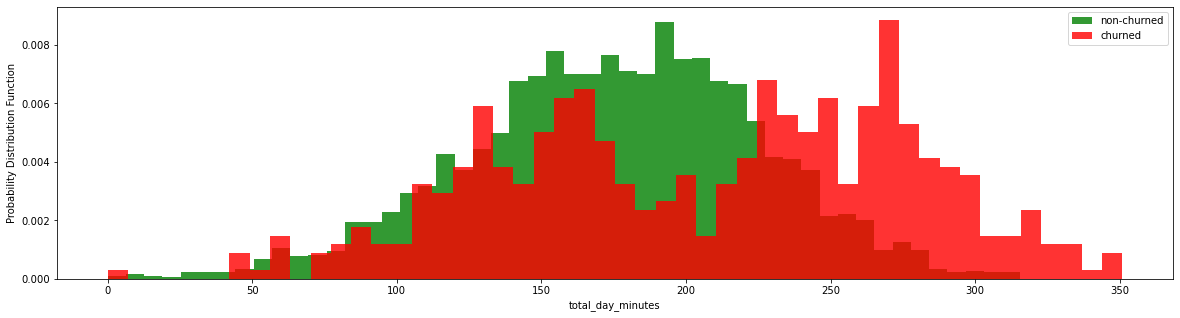

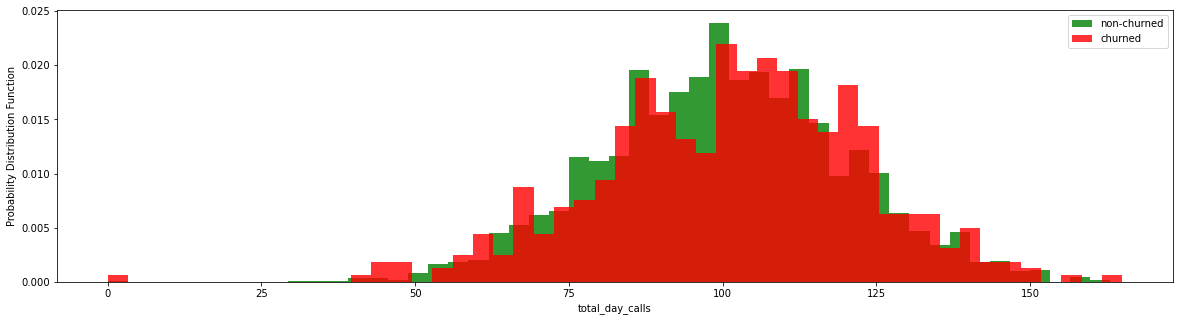

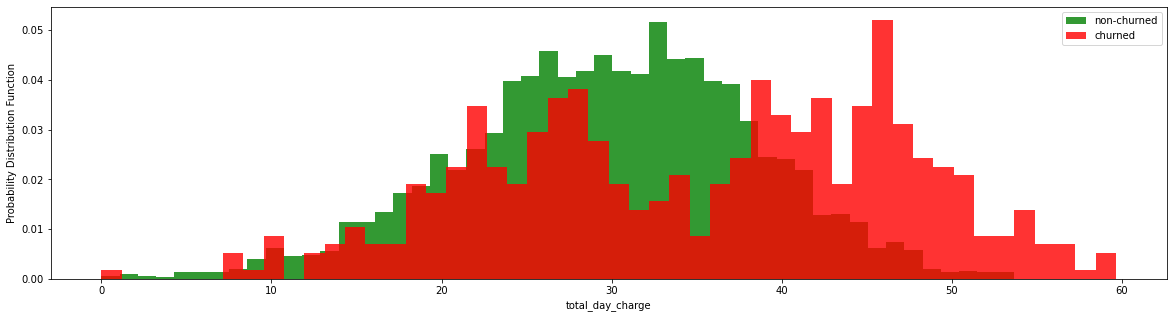

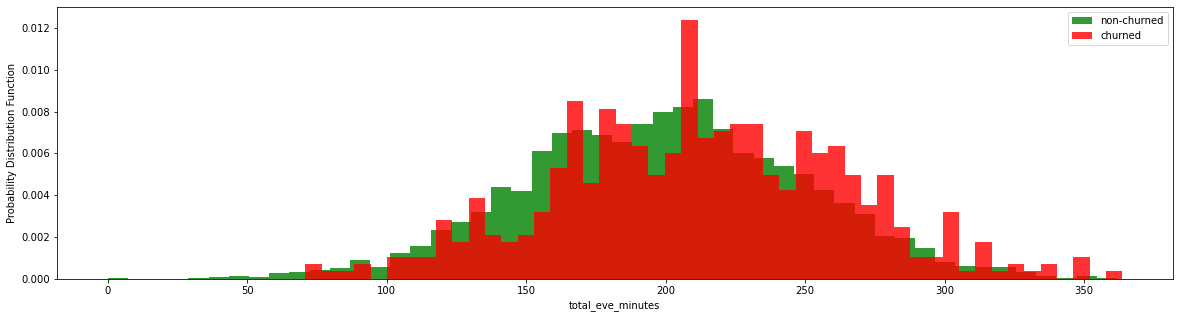

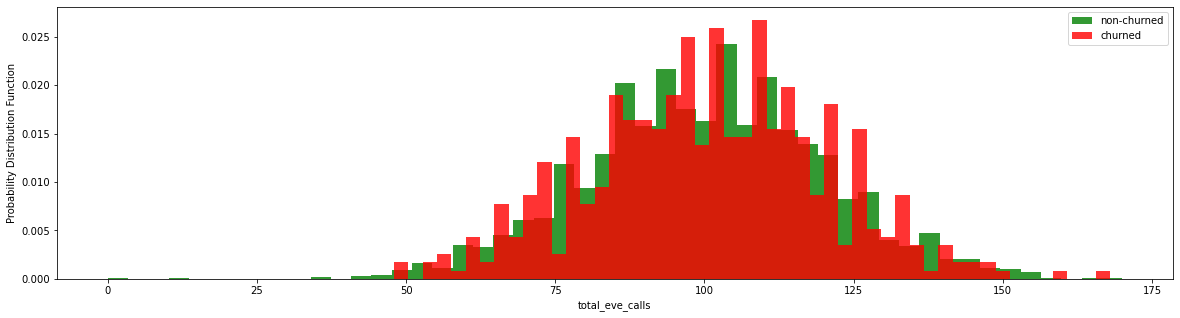

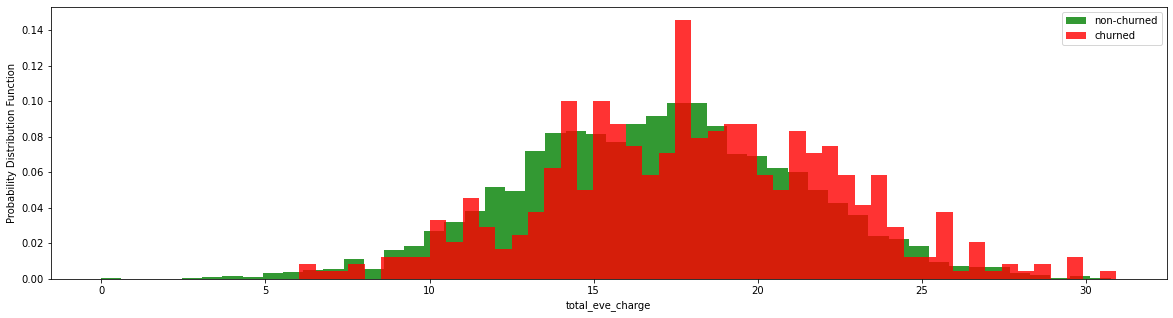

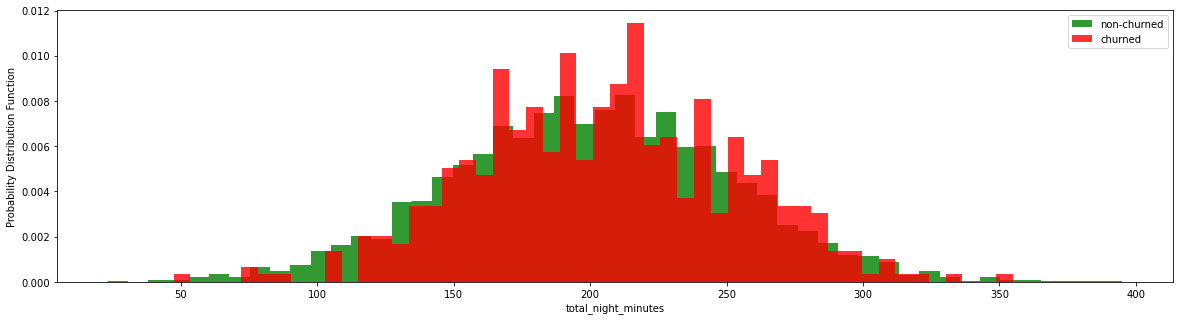

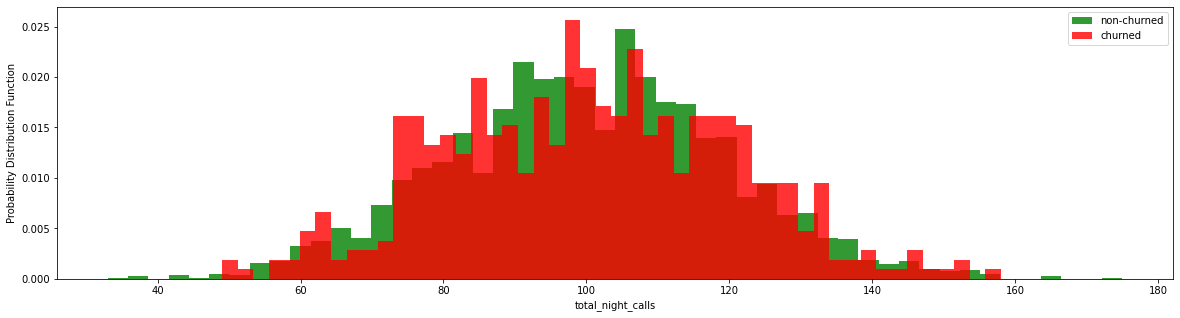

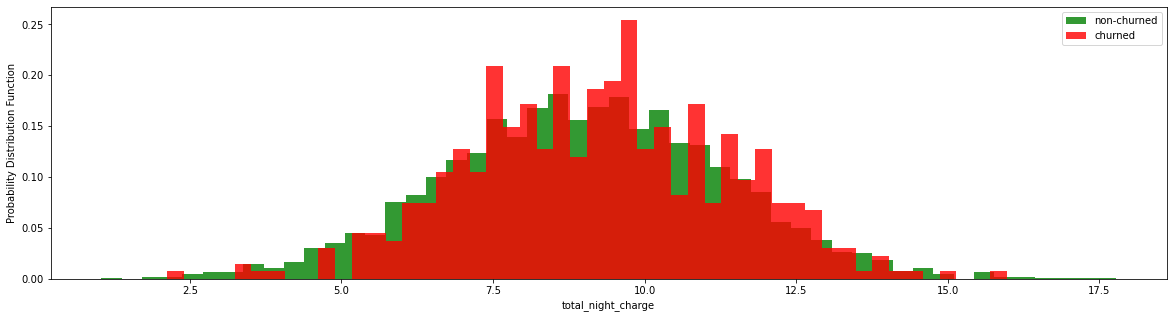

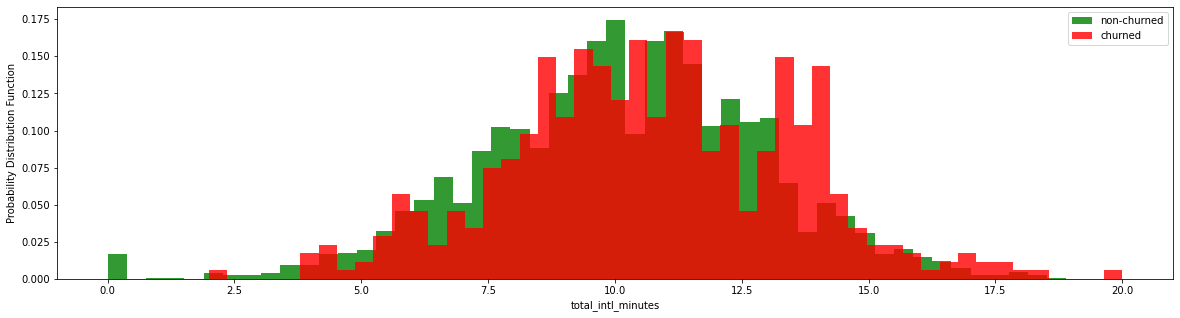

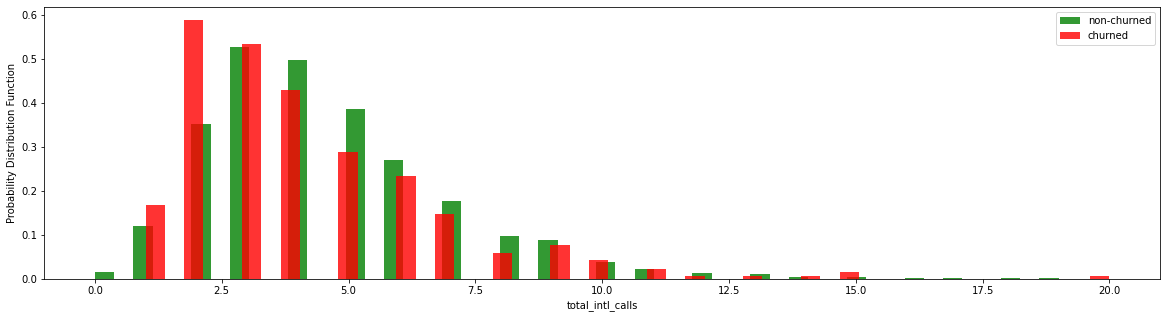

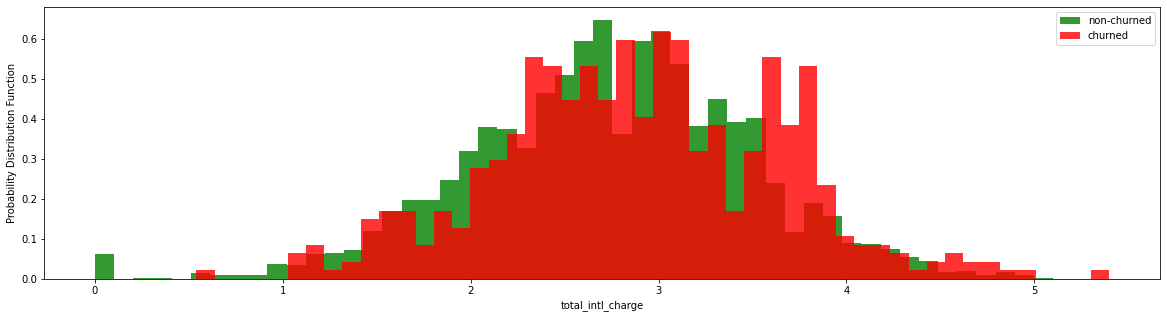

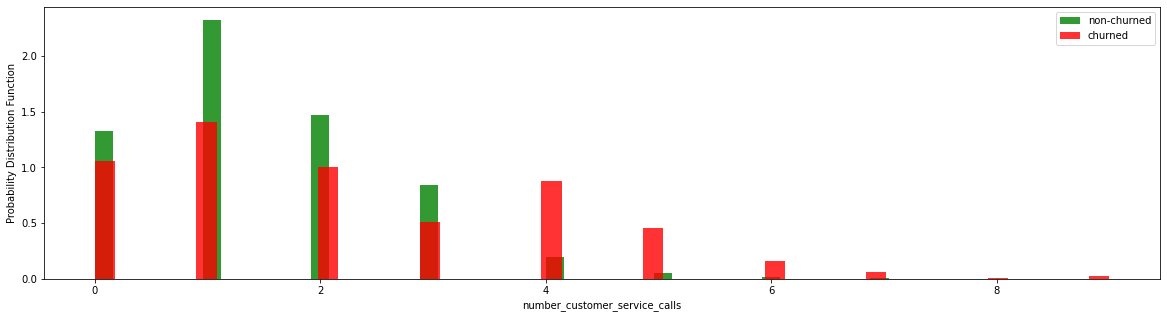

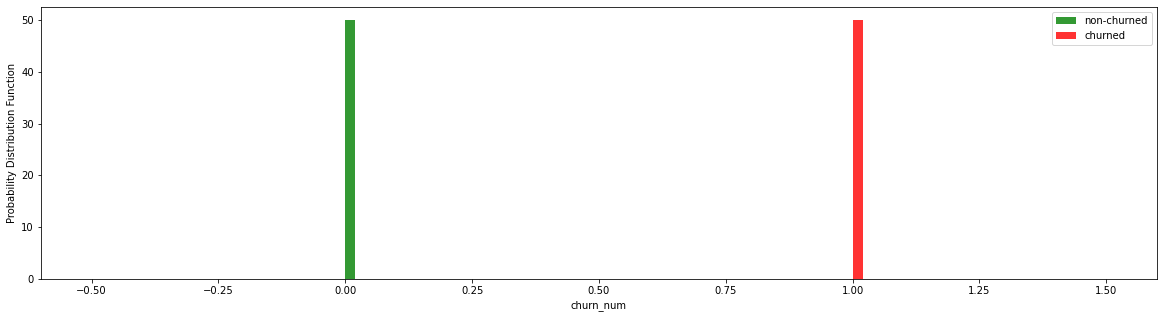

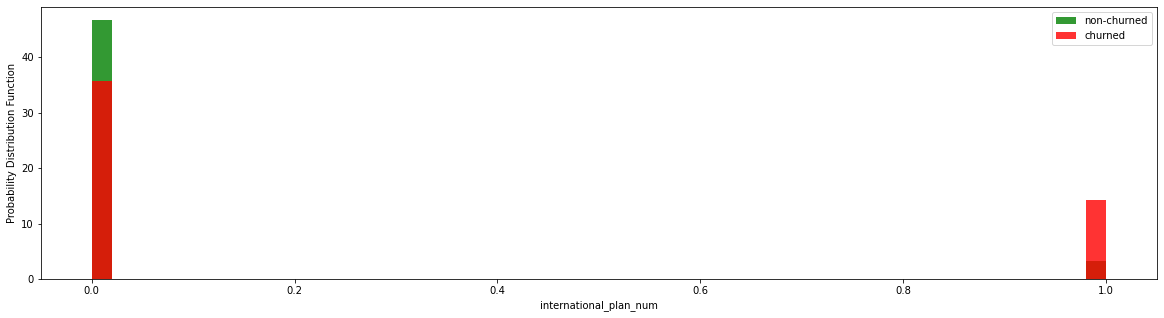

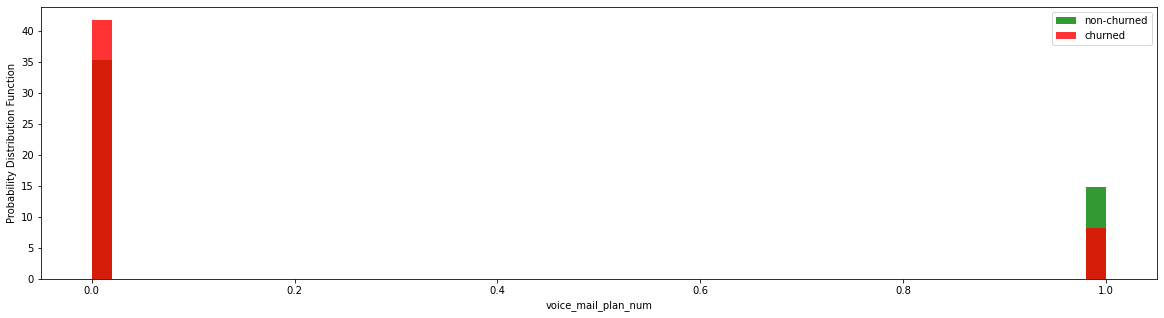

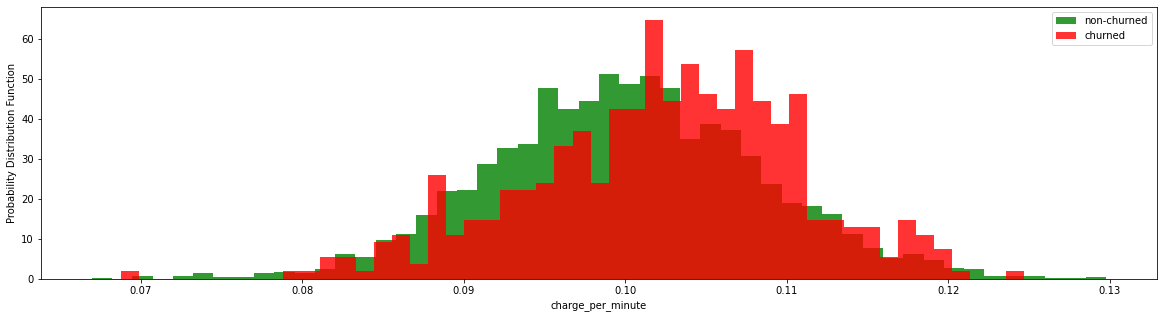

In [73]:
# Plotting probability density function of all variables based on Churn..
def create_pdf(df, varname):
    plt.figure(figsize=(20,5))
    plt.hist(list(df[df['churn_num'] == 0 ][varname]), bins = 50, label = 'non-churned', density = True, color = 'g', alpha = 0.8)
    plt.hist(list(df[df['churn_num'] == 1 ][varname]), bins = 50, label = 'churned', density = True, color = 'r', alpha = 0.8)
    plt.legend(loc='upper right')
    plt.xlabel(varname)
    plt.ylabel('Probability Distribution Function')
    plt.show

for varname in train2.columns:
    create_pdf(train2, varname)


In [77]:
#5 variables can be dropped
drop_after_corr = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge', 'voice_mail_plan_num']
train3 = train2.drop(drop_after_corr, axis=1)
test3 = test2.drop(drop_after_corr, axis=1)

In [78]:
#doing 2 categorical variables
cat_columns = ['state', 'area_code']
train3 = pd.concat([train3, pd.get_dummies(train3[cat_columns], drop_first=True)], axis=1)
test3 = pd.concat([test3, pd.get_dummies(test3[cat_columns], drop_first=True)], axis=1)
train3 = train3.drop(cat_columns, axis = 1)
test3 = test3.drop(cat_columns, axis = 1)

In [79]:
print(train3.shape)
print(test3.shape)

(3333, 66)
(1667, 66)


## 5. Machine Learning Modeling and Hyperparameter Tuning

In a classification problem, we may decide to predict the class values directly.

Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

- False Positive. Predict an event when there was no event.
- False Negative. Predict no event when in fact there was an event.

By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

### 5.1 Logistic Regression

Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable (true/false, yes/no, 0/1, etc), although many more complex extensions exist. The model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

In [83]:
X_train = train3.drop('churn_num',axis=1)
Y_train = train3['churn_num']
X_test = test3.drop('churn_num', axis = 1)
Y_test = test3['churn_num'] 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, average_precision_score, f1_score, confusion_matrix, roc_auc_score,auc, accuracy_score, log_loss, roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
# Logistic Regression with hyper-parameter tuning

#Instantiate
lr=LogisticRegression(random_state=42, solver='liblinear')
param_gridd = { 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 2, 3, 5]}
CV_lr = GridSearchCV(estimator=lr, param_grid=param_gridd, cv= 5)#do this with 5 folds

#Prediction
CV_lr.fit(X_train, Y_train)
lr_best = CV_lr.best_estimator_

In [88]:
lr_best

LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')

In [89]:
test_score_lr = lr_best.predict_proba(X_test)[:, 1]
pd.Series(test_score_lr).describe()

count    1667.000000
mean        0.146759
std         0.170176
min         0.001241
25%         0.036859
50%         0.079460
75%         0.189225
max         0.988484
dtype: float64

### 5.2 Gradient Boosting

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error.

In [90]:
# Gradient Boosting with hyper-parameter tuning
gbr=GradientBoostingClassifier(random_state=42)
param_grid = { 
'n_estimators': [50, 100, 500], 'max_features': ['auto'], 'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv= 5)
CV_gbr.fit(X_train, Y_train)
gbr_best = CV_gbr.best_estimator_
print(gbr_best)

GradientBoostingClassifier(learning_rate=0.05, max_features='auto',
                           n_estimators=500, random_state=42)


In [91]:
test_score_gbm = gbr_best.predict_proba(X_test)[:, 1]
pd.Series(test_score_gbm).describe()

count    1667.000000
mean        0.129066
std         0.261451
min         0.000514
25%         0.015895
50%         0.024422
75%         0.053498
max         0.999998
dtype: float64

## 6. Performance Comparison of Models

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

- False Positive. Predict an event when there was no event.
- False Negative. Predict no event when in fact there was an event.

By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

#### ROC/AUC

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

The true positive rate is also referred to as sensitivity.

The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.

It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.

The false positive rate is also referred to as the inverted specificity where specificity is the total number of true negatives divided by the sum of the number of true negatives and false positives.

The curves of different models can be compared directly in general or for different thresholds.

The area under the curve (AUC) can be used as a summary of the model skill.

#### Precision Recall Curve

Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes.

#### When to Use ROC vs. Precision-Recall Curves?

Generally, the use of ROC curves and precision-recall curves are as follows:

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [92]:
#Area Under ROC and PR curves for LR model
roc_auc = (roc_auc_score(Y_test, test_score_lr, average='macro'))
avg_pre = average_precision_score(Y_test, test_score_lr)
print (roc_auc)
print (avg_pre)


0.83375099000099
0.46123237781890536


In [93]:
#Area Under ROC and PR curves for GBM model
roc_auc_gbm = (roc_auc_score(Y_test, test_score_gbm, average='macro'))
avg_pre_gbm = average_precision_score(Y_test, test_score_gbm)
print (roc_auc_gbm)
print (avg_pre_gbm)

0.9215547965547966
0.8504506893060221


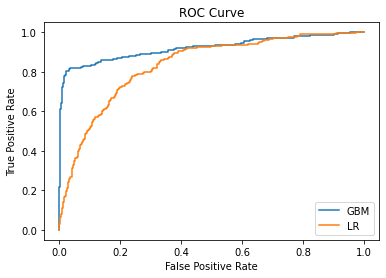

In [94]:
fpr_gbm, tpr_gbm, _ =roc_curve(Y_test, test_score_gbm)
plt.plot(fpr_gbm, tpr_gbm, label ='GBM')
fpr_lr, tpr_lr, _ =roc_curve(Y_test, test_score_lr)
plt.plot(fpr_lr, tpr_lr, label ='LR')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()

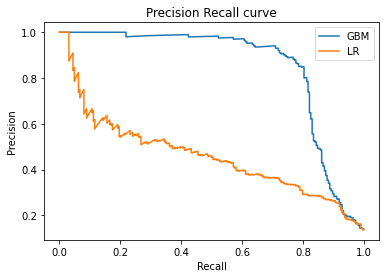

In [95]:
precision_gbm, recall_gbm, _ =precision_recall_curve(Y_test, test_score_gbm)
plt.plot(recall_gbm, precision_gbm, label ='GBM')
precision_lr, recall_lr, _ =precision_recall_curve(Y_test, test_score_lr)
plt.plot(recall_lr, precision_lr, label ='LR')
plt.xlabel('Recall'); 
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend()

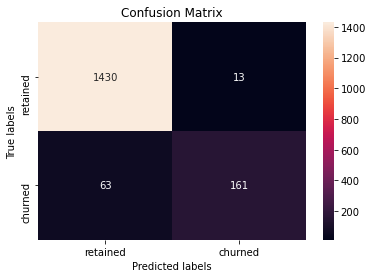

In [96]:
cm = confusion_matrix(Y_test, (test_score_gbm >= 0.5)) 
ax= plt.subplot()
sns.heatmap(cm, annot=True,  ax = ax, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['retained', 'churned']); ax.yaxis.set_ticklabels(['retained', 'churned']);

In [97]:
print(accuracy_score(Y_test, (test_score_lr >= 0.5), normalize=True))
print(accuracy_score(Y_test, (test_score_gbm >= 0.5), normalize=True))

0.8722255548890222
0.9544091181763648


In [98]:
def get_FI(modelname, dfname):
    feature_importance = pd.DataFrame([X_train.columns.tolist(), gbr_best.feature_importances_ ]).T
    feature_importance.columns = ['varname', 'importance']
    feature_importance = feature_importance.sort_values(by=['importance'], ascending=False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance
get_FI(gbr_best, X_train)

varname importance cum_importance
2               total_day_minutes   0.269874       0.269874
10  number_customer_service_calls   0.159555       0.429429
4               total_eve_minutes   0.135298       0.564727
8              total_intl_minutes   0.106081       0.670808
11         international_plan_num  0.0860579       0.756866
..                            ...        ...            ...
59                       state_WA          0              1
60                       state_WI          0              1
61                       state_WV          0              1
62                       state_WY          0              1
32                       state_MD          0              1

[65 rows x 3 columns]

## 7. Recursive Feature Elimination

Recursive feature elimination is a feature selection method that fits a model and removes the weakest features.

In [99]:
state_vars = [x for x in X_train.columns if 'state' in x]
area_vars = [x for x in X_train.columns if 'area' in x]
rfe_vars = state_vars + area_vars
print(len(rfe_vars))
X_train_rfe = X_train.drop(rfe_vars, axis=1 ) 
X_test_rfe = X_test.drop(rfe_vars, axis=1)
X_test_rfe.shape

52


(1667, 13)

In [100]:
# Gradient Boosting on reduced feature set
gbr=GradientBoostingClassifier(random_state=42)
param_grid = { 
'n_estimators': [50, 100, 500], 'max_features': ['auto'], 'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv= 5)
CV_gbr.fit(X_train_rfe, Y_train)
gbr_best_rfe = CV_gbr.best_estimator_
print(gbr_best_rfe)

GradientBoostingClassifier(learning_rate=0.05, max_features='auto',
                           n_estimators=500, random_state=42)


In [101]:
test_score_rfe = gbr_best_rfe.predict_proba(X_test_rfe)[:, 1]
print(pd.Series(test_score_rfe).describe())
roc_auc_gbm = (roc_auc_score(Y_test, test_score_rfe, average='macro'))
avg_pre_gbm = average_precision_score(Y_test, test_score_rfe)
print (roc_auc_gbm)
print (avg_pre_gbm)


count    1667.000000
mean        0.127605
std         0.260754
min         0.001585
25%         0.015223
50%         0.024144
75%         0.052756
max         0.999968
dtype: float64
0.9246207058707059
0.8531759770164753


In [102]:
FI = get_FI(gbr_best_rfe, X_train_rfe)
FI = FI.loc[FI['importance'] > 0.01]

print(FI)

                          varname importance cum_importance
2               total_day_minutes   0.269874       0.269874
10  number_customer_service_calls   0.159555       0.429429
4               total_eve_minutes   0.135298       0.564727
8              total_intl_minutes   0.106081       0.670808
11         international_plan_num  0.0860579       0.756866
1           number_vmail_messages  0.0829802       0.839846
9                total_intl_calls  0.0808309       0.920677
12              charge_per_minute  0.0167494       0.937426
6             total_night_minutes  0.0161481       0.953574


## 8. Key Drivers of Churn

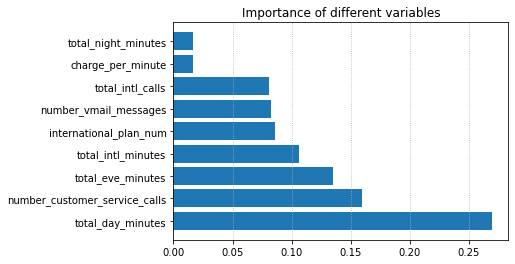

In [103]:
vals = list(FI['importance'])
plt.barh(FI['varname'], FI['importance'])
plt.title('Importance of different variables')
plt.gca().xaxis.grid(linestyle=':')